# Outlier detection

In [1]:
import sklearn.datasets as ds
import pandas as pd

iris = ds.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label']= iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Univariate outlier detection 

In [2]:
#Construct an artificial outlier in "sepal length" first
df.iloc[100,0]=170
df.iloc[100,:]

sepal length (cm)    170.0
sepal width (cm)       3.3
petal length (cm)      6.0
petal width (cm)       2.5
label                  2.0
Name: 100, dtype: float64

In [3]:
#Compare min and max value to mean
print('min: ',df.iloc[:,0].min(),
      '\nmax: ',df.iloc[:,0].max(),
      '\nmean: ',df.iloc[:,0].mean())

min:  4.3 
max:  170.0 
mean:  6.934666666666667


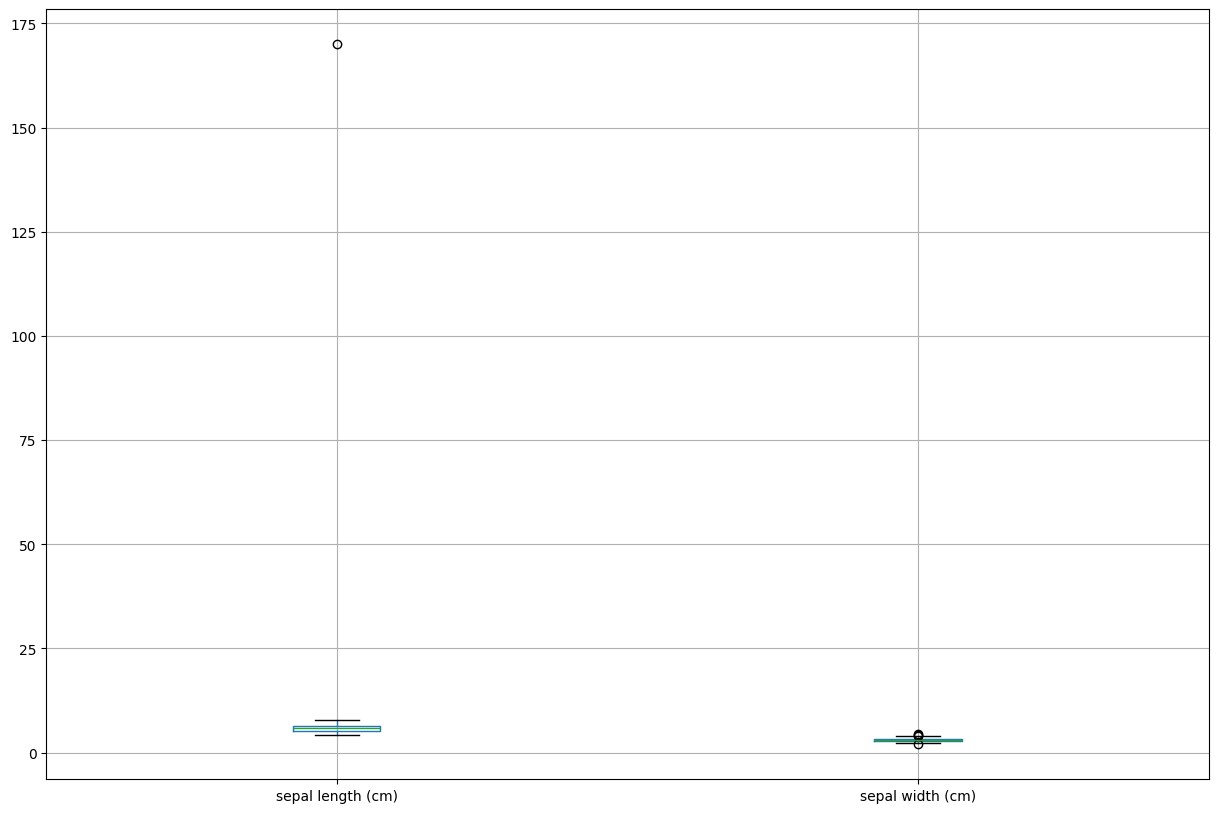

In [4]:
#Boxplot of features "sepal length" and "sepal width"
%matplotlib inline
boxplot = df.iloc[:,0:2].boxplot(figsize=(15, 10))

# Multivariate outlier detection

In [5]:
#Calculate Mahalanobis distance
import numpy as np
import pandas as pd
import scipy as stats

# calculateMahalanobis function to calculate the Mahalanobis distance
def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(y_mu, inv_covmat)
        mahal = np.dot(left, y_mu.T)
        return mahal.diagonal()


# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
df['calculateMahalanobis'] = calculateMahalanobis(y=df, 
                                                  data=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','label']])

# Display the dataframe
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,calculateMahalanobis
0,5.1,3.5,1.4,0.2,0,144.058126
1,4.9,3.0,1.4,0.2,0,141.844007
2,4.7,3.2,1.3,0.2,0,137.193965
3,4.6,3.1,1.5,0.2,0,147.067061
4,5.0,3.6,1.4,0.2,0,144.890988
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,92.575159
146,6.3,2.5,5.0,1.9,2,110.898777
147,6.5,3.0,5.2,2.0,2,113.801807
148,6.2,3.4,5.4,2.3,2,104.338030


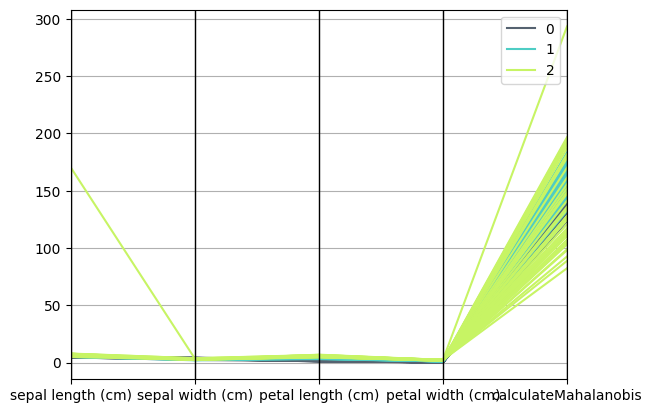

In [8]:
#Parallel coordinates chart pandas
import pandas as pd

pd.plotting.parallel_coordinates(df,class_column='label',color=('#556270', '#4ECDC4', '#C7F464'));

In [9]:
#Parallel coordinates chart plotly
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 'sepal_length', 'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()